<a href="https://colab.research.google.com/github/singularidadedigital/artificial_inteligence/blob/main/artificial_inteligence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense

#Common used modules
import numpy as np
import os,sys

#images, plots, display and visualization
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
import IPython
from six.moves import urllib
print(tf.__version__)

2.13.0


Let´s start with using fully-connected neural network to do predict housing prices. The following image higlights the diference between regression and clssification. Given an observation as input, regression outputs a continuous value (e.g exact temperature) and classification outputs a class/category that the oservation belongs to.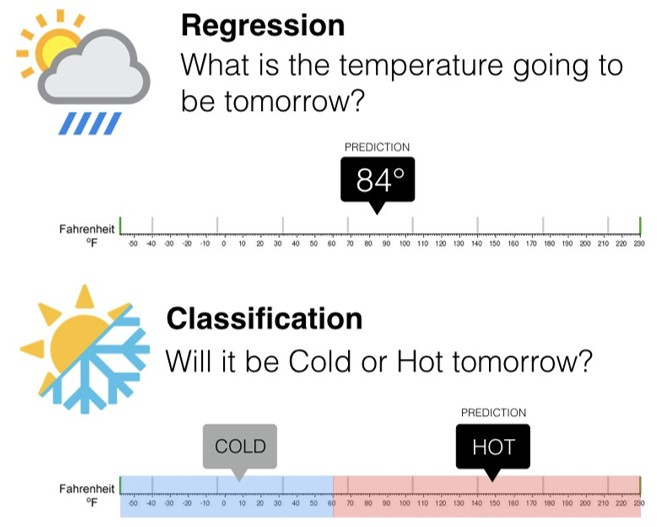

For the Boston housing dataset, we get 506 rows of data, with 13 features in each. Our task is to build a regression model that takes 13 features as input and output a single value prediction of the "median value of owner-occupied homes (in $1000)"
Now, we load the dataset. Loading the dataset returns four Numpy arrays:
- The train_images and train_labels arrays are the training set - the data model uses to learn.
- The models tested against the test set, the test_images, and test_labels arrays.

In [4]:
(train_features,train_labels),(test_features, test_labels) = keras.datasets.boston_housing.load_data()

#get per-features statistics(mean, standard deviation) from the training set to normalize by
train_mean = np.mean(train_features,axis=0)
train_std = np.std(train_features,axis=0)
train_features = (train_features - train_mean) / train_std

57026/57026 [==============================] - 0s 0us/step


##Building the model
Building the neural network requires configuring the layers of the model, then compiling the mode. First we stack a few layers together using keras.Sequentinal. Next we configure the loss function, optimizer, and metrics to monitor. These are added during the model´s  compile step:
- Loss function - measure how accurate the model is during training, we want to minimize this with the optimzer.
- Optimizer - how the model is updated based on the data it sees and its loss function.
Metrics - used to monitor the training and testing steps.

Let´s build a notework with 1 hidden layer of 20 neurons, and use mean squared error (MSE) as the loss function (most common one for regression problems):

In [13]:
def build_model():
  model = keras.Sequential([
      Dense(20, activation=tf.nn.relu, input_shape=[len(train_features[0])]),
      Dense(1)
  ])

  model.compile(optimizer=tf.optimizers.Adam(),
                loss='mse',
                metrics=['mae','mse'])
  return model

## Train the model
Training the neural network model requires the following steps:
1. Feed the training data to the model - in the examplo, the train_features and train_labels arrays.
2. The model learns to associate features and labels.
3. We ask the model to make predictions about a test set - in the example, the test_features array. We verify that the predictions match the test_labels
 array.
 To start training, call model.fit method - the models is"fit" to the training data:

In [19]:
#this helps makes our outpu less verbose but still shows progress
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs):
    if epoch % 100 == 0: print('')
    print('.',end='')

model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss',patience=50)
history = model.fit(train_features,
                    train_labels,
                    epochs=1000,
                    verbose=0,
                    validation_split=0.1,
                    callbacks=[early_stop,PrintDot()])
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

#show RMSE measure to compare to kaggle leaderboard on https://www.kaggle.com/c/bosotn-housing/leaderboard
# rmse_final = np.sqrt(float(hist['val_mean_squared_error'].tail(1)))
rmse_final = np.sqrt(float(hist['val_mse'].tail(1)))
print()
print('Final Root Mean Square Error on validation set: {}'.format(round(rmse_final,3)))


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
...............................................
Final Root Mean Square Error on validation set: 2.409


Now, let´s plot the loss function measure on the training and validation sets

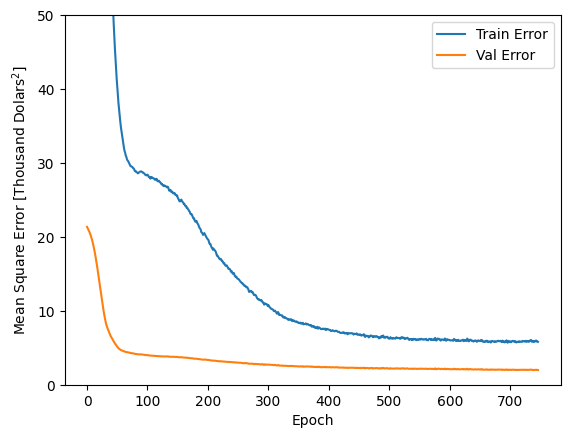

In [30]:
def plot_history():
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [Thousand Dolars$^2$]')
  plt.plot(hist['epoch'], hist['val_mse'], label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'], label='Val Error')
  plt.legend()
  plt.ylim([0,50])

plot_history()